Importation des librairies

In [1]:
import time
import math
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Création des données d'apprentissage et de test

In [77]:
nbtirage=50
ec=0.35

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
#Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,ec,nbtirage)
Y_app=np.sin(2*math.pi*(X_app))+np.random.normal(0,ec,nbtirage)
#Y_test=np.sin(2*math.pi*(X_test*X_test))
Y_test=np.sin(2*math.pi*(X_test))



Tracé des données

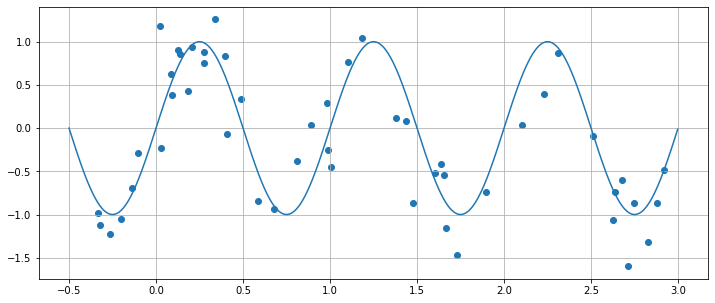

In [78]:
# #############################################################################
plt.figure(figsize=(12,5))
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Apprentissage de la regression

In [91]:
gam=100
alph=0.1

X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))

kr1=KernelRidge(kernel='rbf', gamma=gam, alpha=alph/10)
kr1.fit(X_app, Y_app)
Y_kr1=kr1.predict(X_test)
kr2=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
kr2.fit(X_app, Y_app)
Y_kr2=kr2.predict(X_test)
kr3=KernelRidge(kernel='rbf', gamma=gam, alpha=alph*10)
kr3.fit(X_app, Y_app)
Y_kr3=kr3.predict(X_test)

Tracé du résultat

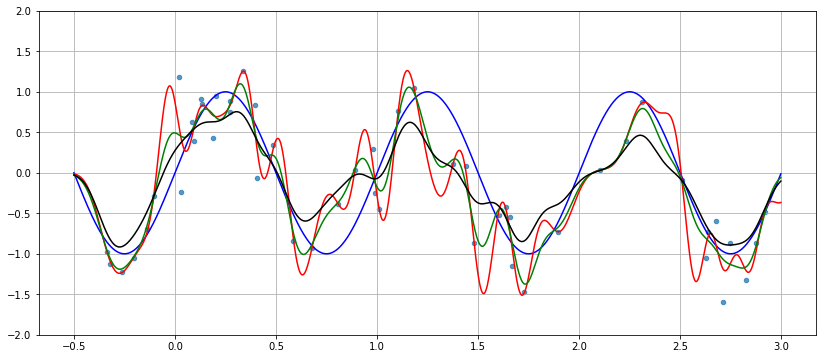

In [94]:
a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
axes.set_ylim([-2,2])
plt.plot(X_test, Y_test,color='blue')
plt.plot(X_test, Y_kr1,color='red')
plt.plot(X_test, Y_kr2,color='green')
plt.plot(X_test, Y_kr3,color='black')
plt.scatter(X_app, Y_app,s=20, alpha=0.75)
plt.grid()
plt.show()

Evaluation des performances

In [93]:
perf = np.array([0.,0.,0.])
perf[0]=sum((Y_test-Y_kr1)*(Y_test-Y_kr1))
perf[1]=sum((Y_test-Y_kr2)*(Y_test-Y_kr2))
perf[2]=sum((Y_test-Y_kr3)*(Y_test-Y_kr3))
print(perf)

[415.48952314 209.90325621 215.71489361]


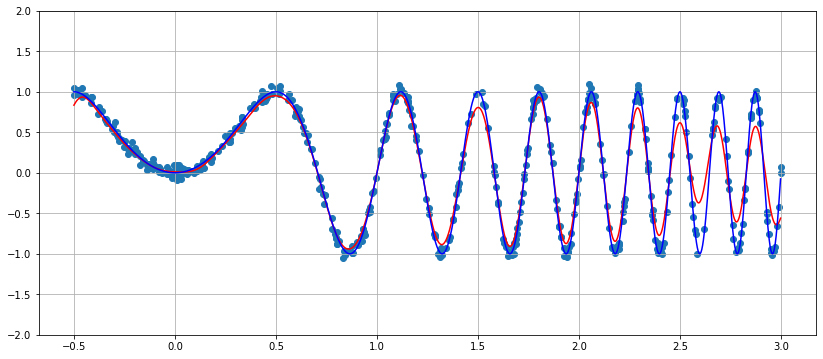

In [62]:
a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
axes.set_ylim([-2,2])
plt.plot(X_test, Y_kr,color='red')
plt.plot(X_test, Y_test,color='blue')
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()